In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

In [3]:
if 'bigDataFrame' in globals():
    print("Exist, do nothing!")
else:
    print("Read data.")
    bigDataFrame = pd.read_pickle("../output/bigDataFrame.pkl")
    bigDataFrame.rename(columns={"PM2.5": "PM25"}, inplace=True)

Read data.


In [4]:
stations = pd.read_excel("../input/Metadane_wer20160914.xlsx")

In [5]:
oneHour = bigDataFrame['2015-06-12 08:00:00':'2015-06-12 08:00:00']

In [6]:
oneHour.index = oneHour.index.droplevel(level=0)

In [7]:
pollutants = oneHour.columns

In [8]:
oneHour["coords"] = oneHour.index.map(lambda name: map(list,stations[stations["Kod stacji"] == name][[u'WGS84 φ N', u'WGS84 λ E']].values)[0])

/home/damian/.virtualenvs/kaggle/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
oneHour

,C6H6,CO,NO2,O3,PM10,PM25,SO2,coords
Station,,,,,,,,
DsBogatFrancMOB,NaN,NaN,NaN,NaN,37.698400,NaN,NaN,"[50.940998, 14.91679]"
DsCzerStraza,NaN,NaN,NaN,70.991500,NaN,NaN,NaN,"[50.912475, 15.31219]"
DsDzialoszyn,NaN,NaN,NaN,NaN,21.686000,NaN,NaN,"[50.972167, 14.941319]"
DsDziePilsud,NaN,NaN,28.750800,NaN,36.392400,NaN,2.340770,"[50.732817, 16.64805]"
DsJelGorOgin,NaN,NaN,NaN,20.468700,51.668300,21.811900,NaN,"[50.913433, 15.765608]"
DsKlodzSzkol,NaN,NaN,32.326500,16.525200,38.180300,NaN,5.436460,"[50.433493, 16.65366]"
DsLegAlRzecz,1.805310,0.349643,25.372200,48.415300,38.787700,NaN,3.305320,"[51.204503, 16.180513]"
DsNowRudSreb,NaN,NaN,NaN,NaN,18.683400,NaN,NaN,"[50.579914, 16.514422]"
DsOsieczow21,NaN,NaN,NaN,65.225400,NaN,NaN,NaN,"[51.31763, 15.431719]"


In [10]:
oneHour[["lat", "long"]] = oneHour["coords"].apply(pd.Series)
oneHour.drop("coords", axis=1, inplace=True)

/home/damian/.virtualenvs/kaggle/local/lib/python2.7/site-packages/pandas/core/frame.py:2369: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/home/damian/.virtualenvs/kaggle/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
oneHour

,C6H6,CO,NO2,O3,PM10,PM25,SO2,lat,long
Station,,,,,,,,,
DsBogatFrancMOB,NaN,NaN,NaN,NaN,37.698400,NaN,NaN,50.940998,14.916790
DsCzerStraza,NaN,NaN,NaN,70.991500,NaN,NaN,NaN,50.912475,15.312190
DsDzialoszyn,NaN,NaN,NaN,NaN,21.686000,NaN,NaN,50.972167,14.941319
DsDziePilsud,NaN,NaN,28.750800,NaN,36.392400,NaN,2.340770,50.732817,16.648050
DsJelGorOgin,NaN,NaN,NaN,20.468700,51.668300,21.811900,NaN,50.913433,15.765608
DsKlodzSzkol,NaN,NaN,32.326500,16.525200,38.180300,NaN,5.436460,50.433493,16.653660
DsLegAlRzecz,1.805310,0.349643,25.372200,48.415300,38.787700,NaN,3.305320,51.204503,16.180513
DsNowRudSreb,NaN,NaN,NaN,NaN,18.683400,NaN,NaN,50.579914,16.514422
DsOsieczow21,NaN,NaN,NaN,65.225400,NaN,NaN,NaN,51.317630,15.431719


C6H6


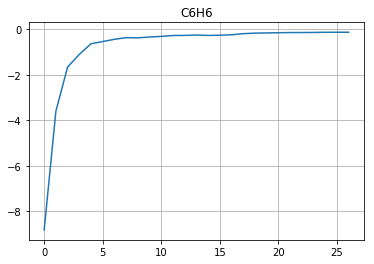

CO


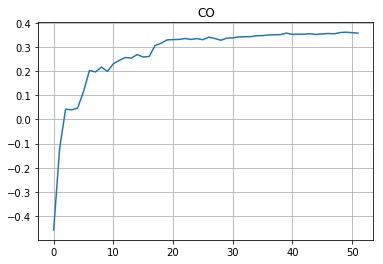

NO2


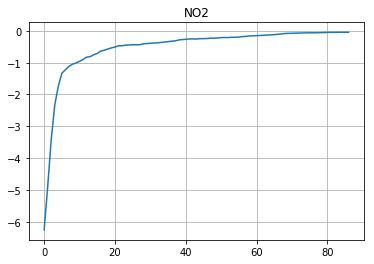

O3


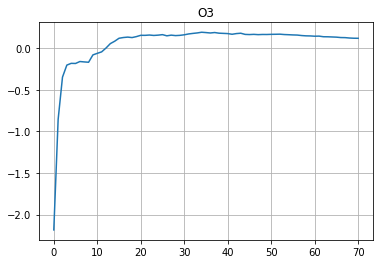

PM10


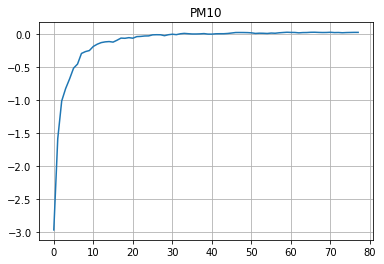

PM25


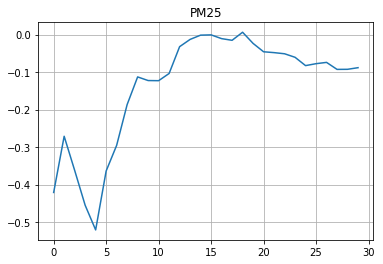

SO2


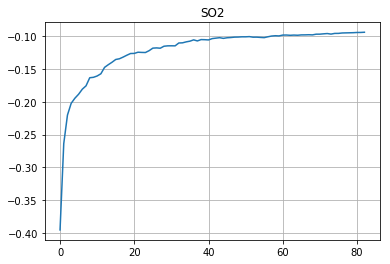

In [13]:
for pollutant in pollutants:
    print pollutant
    scores = []
    inputData = oneHour[[pollutant, "lat", "long"]]
    predictData = inputData[~pd.notnull(inputData[pollutant])]
    trainData = inputData[pd.notnull(inputData[pollutant])]
    
    X = trainData[["lat", "long"]]
    y = trainData[pollutant]
    
    X_train, X_test, y_train, y_test = train_test_split(X.values,y.values, random_state=42)
    for neighbo in range(1,len(X_train)+1):
        #print neighbo
        neigh = KNeighborsRegressor(n_neighbors=neighbo, weights="distance")
        neigh.fit(X_train, y_train) 
        scores.append(neigh.score(X_test, y_test))
    plt.plot(scores)
    plt.title(pollutant)
    plt.grid()
    plt.show()
    #break